In [3]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


# Pie chart for Job Work From Home

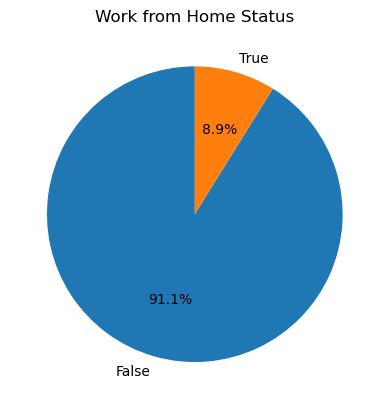

In [15]:
df['job_work_from_home'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')
plt.title('Work from Home Status')
plt.ylabel('')
plt.show()

# Pie chart for Job Titles

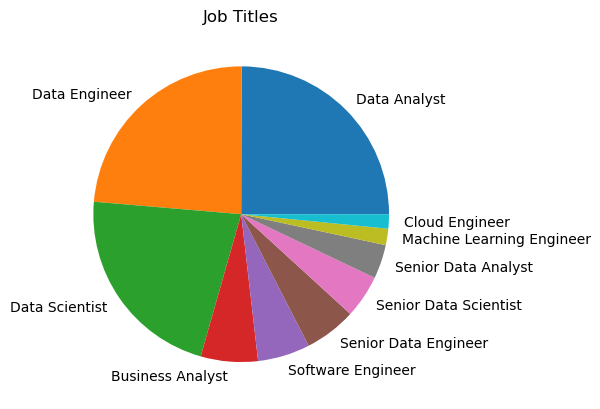

In [17]:
df['job_title_short'].value_counts().plot(kind='pie')
plt.title('Job Titles')
plt.ylabel('')
plt.show()

# Combine with Subplot

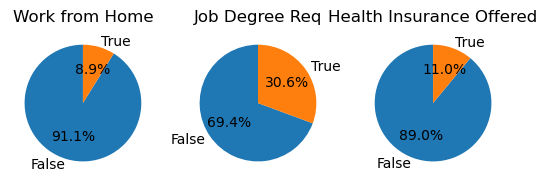

In [31]:
fig,ax = plt.subplots(1,3)

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(),startangle=90, autopct='%1.1f%%',labels=['False','True'])
    ax[i].set_title(title)

plt.show()

# Health Insurance Pie Chart

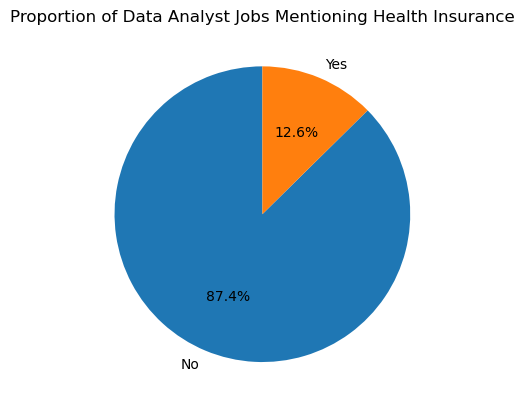

In [48]:
df_DA = df.copy()
df_DA = df_DA[df_DA['job_title_short'] == 'Data Analyst']

df_DA['job_health_insurance'].value_counts().plot(kind='pie',startangle=90,
autopct='%1.1f%%',labels=['No','Yes'])
plt.title('Proportion of Data Analyst Jobs Mentioning Health Insurance')
plt.ylabel('')
plt.show()

# Job Schedule Distribution

Text(0.5, 1.0, 'Job Schedule Full-time vs. Part-time')

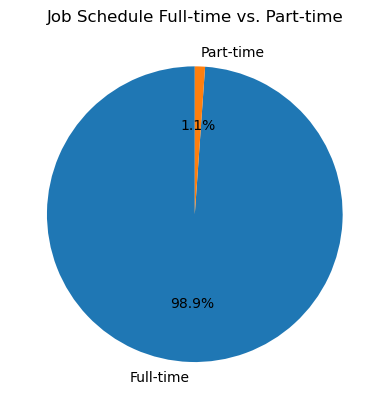

In [63]:
df_ft_pt = df.copy()
df_ft = df_ft_pt[df_ft_pt['job_schedule_type'] == 'Full-time']
df_pt = df_ft_pt[df_ft_pt['job_schedule_type'] == 'Part-time']
df_ft_pt = pd.concat([df_ft,df_pt])

df_ft_pt['job_schedule_type'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')
plt.ylabel('')
plt.title('Job Schedule Full-time vs. Part-time')

# Degree Mentioned Pie Chart

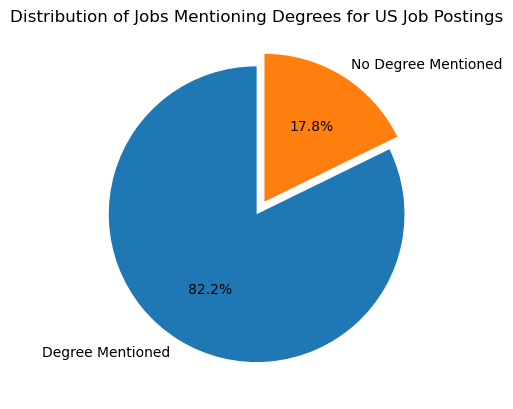

In [74]:
df_US = df.copy()
df_US = df_US[df_US['job_country'] == 'United States']
df_US['job_no_degree_mention'].value_counts().plot(kind='pie', startangle=90,autopct='%1.1f%%',explode = (0,0.1), labels=['Degree Mentioned','No Degree Mentioned'])
plt.title('Distribution of Jobs Mentioning Degrees for US Job Postings')
plt.ylabel('')
plt.show()